# 데이터 로딩

## IMDB 데이터셋 로드하기

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10000)

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

## 리뷰 하나를 다시 텍스트로 디코딩하기

In [4]:
# 리뷰를 다시 텍스트로 디코딩하기
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# 데이터 준비

## 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        for j in sequences:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 신경망 모델 만들기

## 모델 정의하기

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

## 모델 컴파일하기

In [9]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# 훈련검증

## 검증 세트 준비하기

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 모델 훈련하기

In [11]:
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs = 20, 
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5411 - accuracy: 0.7652 - val_loss: 0.4128 - val_accuracy: 0.8499
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3353 - accuracy: 0.8908 - val_loss: 0.3249 - val_accuracy: 0.8790
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2515 - accuracy: 0.9146 - val_loss: 0.2838 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2047 - accuracy: 0.9309 - val_loss: 0.2751 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1699 - accuracy: 0.9449 - val_loss: 0.3424 - val_accuracy: 0.8647
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1450 - accuracy: 0.9549 - val_loss: 0.3083 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1270 - accuracy: 0.9600 - val_loss: 0.3028 - val_accuracy: 0.8772
Epoch 8/20
30

## 훈련과 검증 손실 그리기

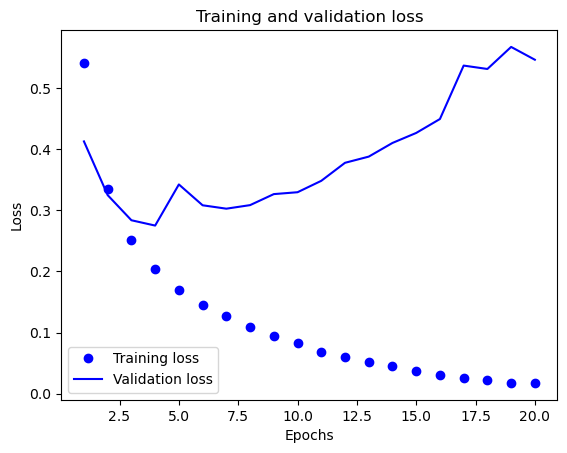

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 훈련과 검증 정확도 그리기

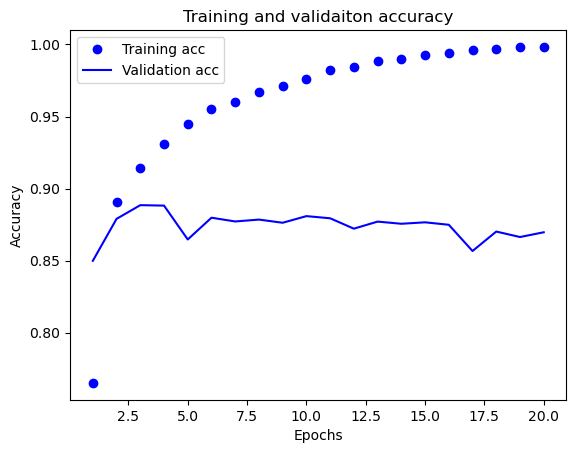

In [13]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validaiton accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 모델을 처음부터 다시 훈련하기

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4832 - accuracy: 0.8050
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2474 - accuracy: 0.9114
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1828 - accuracy: 0.9350
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3082 - accuracy: 0.8806


[0.3081951439380646, 0.8805599808692932]

In [30]:
history.history

{'loss': [0.48872214555740356,
  0.28180602192878723,
  0.21839027106761932,
  0.1855430006980896],
 'accuracy': [0.8047599792480469,
  0.902999997138977,
  0.9232800006866455,
  0.9338799715042114]}